Import packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn import datasets
from scipy.stats import gaussian_kde

In [2]:
data = open('csc.csv', 'rt')
data = np.loadtxt(data, delimiter=",")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(data.shape)
types = pd.read_csv('types.csv',header=None)
print(types.shape)
numtypes = open('types_numeric.csv', 'rt')
numtypes = np.loadtxt(numtypes, delimiter=",")
print(numtypes.shape)
possible_types = pd.read_csv('possible_types.csv',header=None)
print(possible_types.shape)

(6754, 96)
(6754, 1)
(6754,)
(27, 1)


In [3]:
tsne = TSNE(n_components=2, early_exaggeration = 24,verbose=1, perplexity=200, n_iter=1000, learning_rate=800 ,metric='correlation', init='pca');
tsne_results = tsne.fit_transform(scaled_data);

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6754
[t-SNE] Computed conditional probabilities for sample 2000 / 6754
[t-SNE] Computed conditional probabilities for sample 3000 / 6754
[t-SNE] Computed conditional probabilities for sample 4000 / 6754
[t-SNE] Computed conditional probabilities for sample 5000 / 6754
[t-SNE] Computed conditional probabilities for sample 6000 / 6754
[t-SNE] Computed conditional probabilities for sample 6754 / 6754
[t-SNE] Mean sigma: 0.286060
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.402918
[t-SNE] Error after 375 iterations: 0.402918


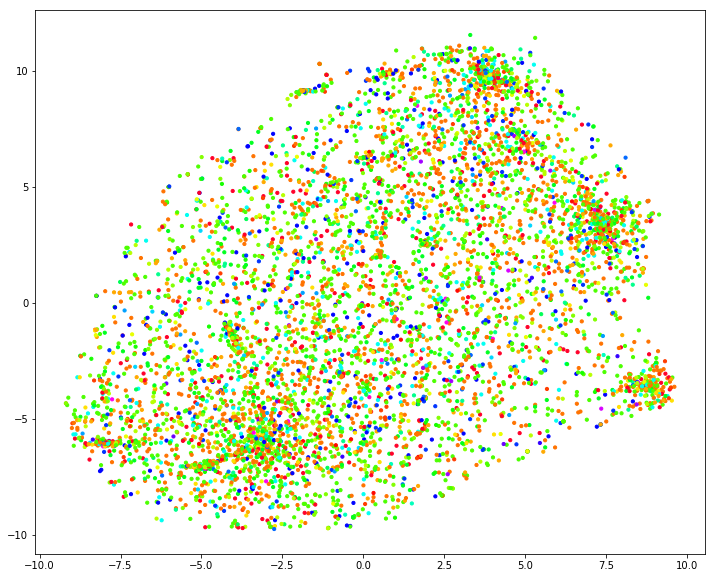

In [4]:
plt.rcParams['figure.figsize'] = (12,10);
plt.figure()
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=normcolors(numtypes), cmap=plt.cm.gist_rainbow, s=10);
plt.show();

Recognize clusters by thinning the low density areas

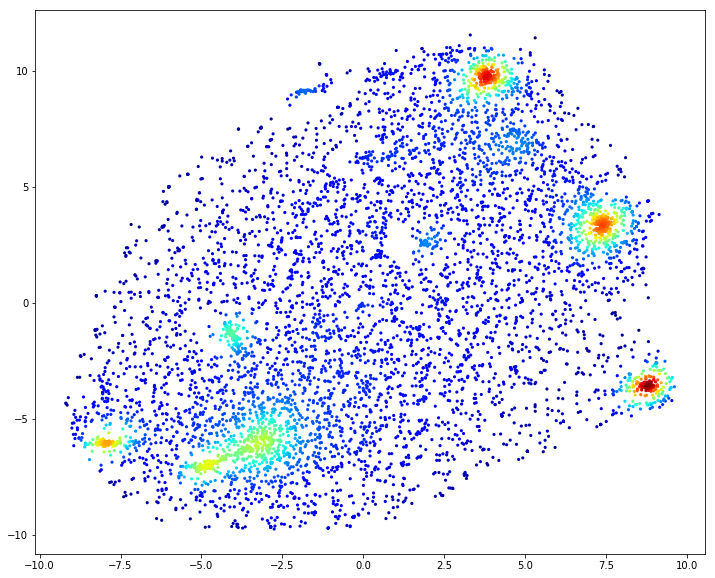

In [5]:
xy = np.vstack([tsne_results[:, 0], tsne_results[:, 1]])
z = gaussian_kde(xy, 0.1)(xy)
z=z/np.max(z)
plt.figure()
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=(z/max(z)), s=10, edgecolor='',cmap=plt.cm.jet)
plt.show()

In [6]:
print np.mean(z)
print np.sqrt(np.var(z))

0.268445395064
0.243192438773


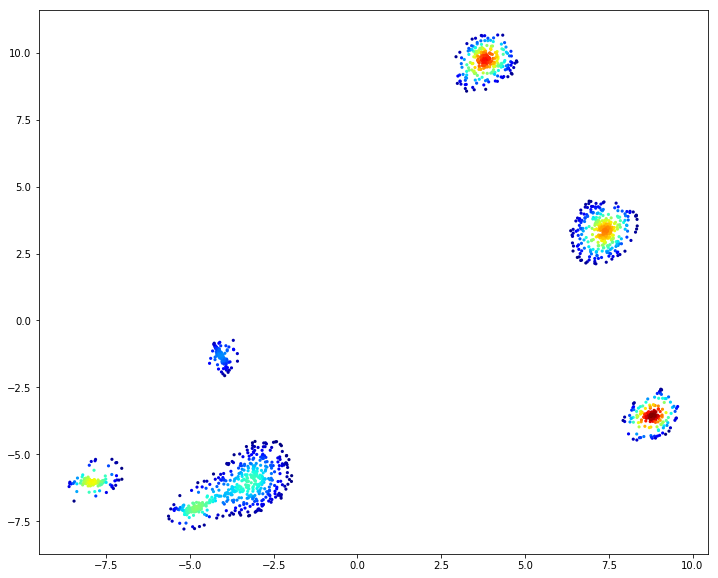

In [21]:
plt.figure()
indhigh = np.where(z>0.275)[0]
plt.scatter(tsne_results[indhigh, 0], tsne_results[indhigh, 1], c=z[indhigh], s=10, edgecolor='',cmap=plt.cm.jet)
plt.show()

In [22]:
Nclust=6
kmeans = KMeans(n_clusters=Nclust).fit(tsne_results[indhigh,:])    

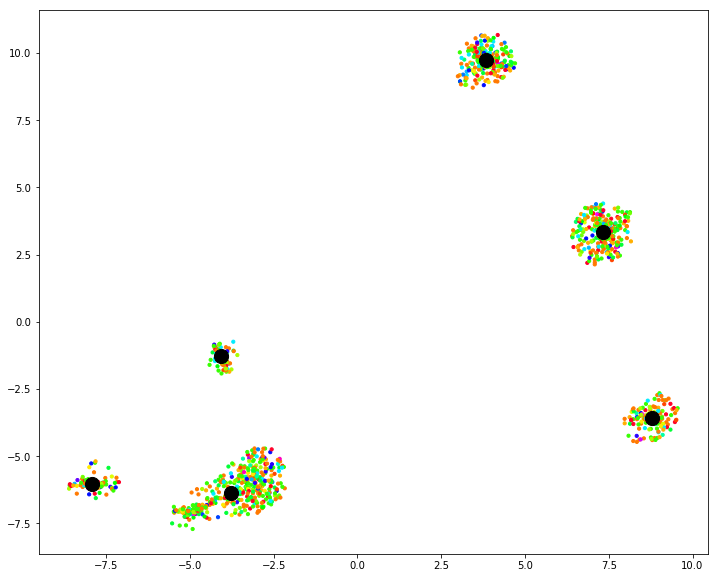

In [9]:
plt.figure()
normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.scatter(tsne_results[indhigh, 0], tsne_results[indhigh, 1], c=normcolors(numtypes[indhigh]), cmap=plt.cm.gist_rainbow, s=10);
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='k', marker=(5, 3))
plt.show();

Next, make a dictionary which contains the indices of samples in each cluster, respectively.

In [23]:
clusterInd=dict()

for n in range(0,Nclust):
    clusterInd[n] = indhigh[np.where(kmeans.labels_== n)]


Now it's easy to plot the individual clusters,

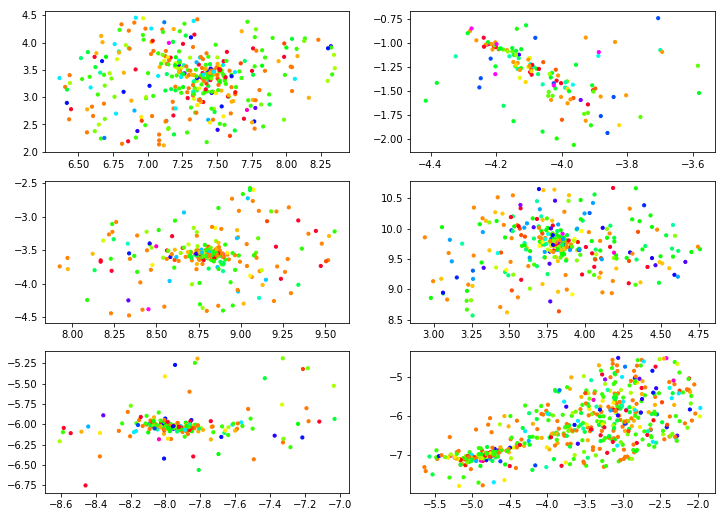

In [24]:
x = tsne_results[:,0]
y = tsne_results[:,1]

normcolors = matplotlib.colors.Normalize(vmin=1.0, vmax=27.0)
plt.figure(figsize=(12, 12))

for n in range(0,Nclust):
    plt.subplot(421+n)
    plt.scatter(x[clusterInd[n]], y[clusterInd[n]], c=normcolors(numtypes[clusterInd[n]]), cmap=plt.cm.gist_rainbow, s=10);


plt.show();

... and the mean substitution class profiles in each of them:

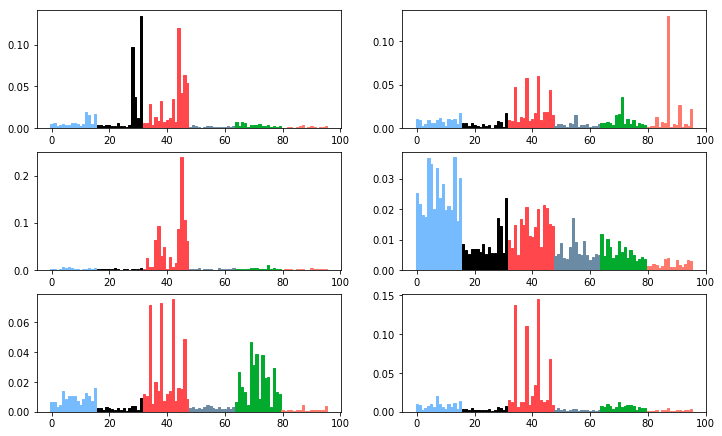

In [129]:
plt.figure()

for n in range(0,Nclust):
    plt.subplot(421+n)
    barlist=plt.bar(np.arange(96), sum(data[clusterInd[n],:])/sum(sum(data[clusterInd[n],:])))
    for i in range(0,16):
        barlist[i].set_color('xkcd:sky blue')
    for i in range(16,32):
        barlist[i].set_color('k')    
    for i in range(32,48):
        barlist[i].set_color('xkcd:light red')
    for i in range(48,64):
        barlist[i].set_color('xkcd:gray blue')
    for i in range(64,80):
        barlist[i].set_color('xkcd:kelly green')
    for i in range(80,96):
        barlist[i].set_color('xkcd:salmon')    
plt.show()

Histograms of cancer types in each cluster:

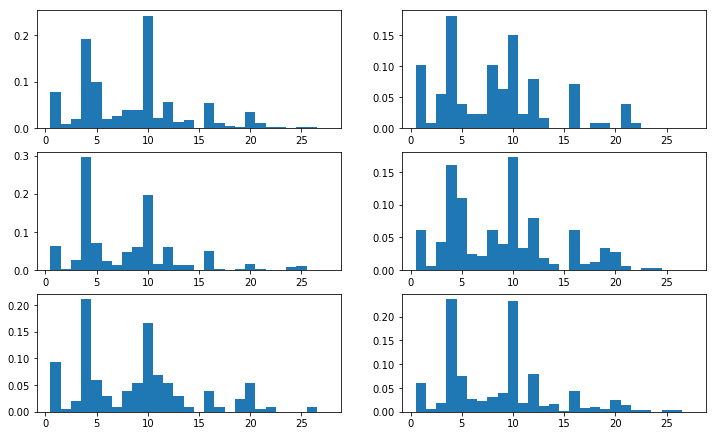

In [118]:
plt.figure()

for n in range(0,Nclust):
    plt.subplot(421+n)
    plt.hist(numtypes[clusterInd[n]], bins=np.arange(0.5,28.5,1), normed=True);

plt.show()